In [2]:
# Import Libraries
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt

In [3]:
# Notebook options
import os

# change working directory
os.chdir('C:\Repos\quant-trading-suite')
print(os.getcwd())

C:\Repos\quant-trading-suite


In [4]:
# Import Single Asset Price data

symbol = '10000LADYSUSDT'
interval = '1H'

con = sqlite3.connect('data/securities_master.db')
c = con.cursor()

# get column names
query = """
PRAGMA table_info(KLINES_1M)
"""
c.execute(query)
cols = c.fetchall()
col_names = [col[1] for col in cols]

# get klines
query = f"""
SELECT * FROM KLINES_1M
WHERE SYMBOL = '{symbol}'
"""
c.execute(query)
data = pd.DataFrame(c.fetchall(), columns=col_names)

data.head()


,Exchange,Product_Type,Symbol,Time,Open,High,Low,Close,Volume,Load_time
0,Bybit,linear,10000LADYSUSDT,2023-05-11 13:02:00,0.001596,0.001596,0.001568,0.001568,1300.0,2023-11-15 18:19:30
1,Bybit,linear,10000LADYSUSDT,2023-05-11 13:03:00,0.001568,0.001568,0.001531,0.001531,4300.0,2023-11-15 18:19:30
2,Bybit,linear,10000LADYSUSDT,2023-05-11 13:04:00,0.001531,0.001567,0.001531,0.001567,1400.0,2023-11-15 18:19:30
3,Bybit,linear,10000LADYSUSDT,2023-05-11 13:05:00,0.001567,0.001567,0.001519,0.001519,2200.0,2023-11-15 18:19:30
4,Bybit,linear,10000LADYSUSDT,2023-05-11 13:06:00,0.001519,0.001530,0.001519,0.001530,38600.0,2023-11-15 18:19:30


<Axes: title={'center': '10000LADYSUSDT'}>

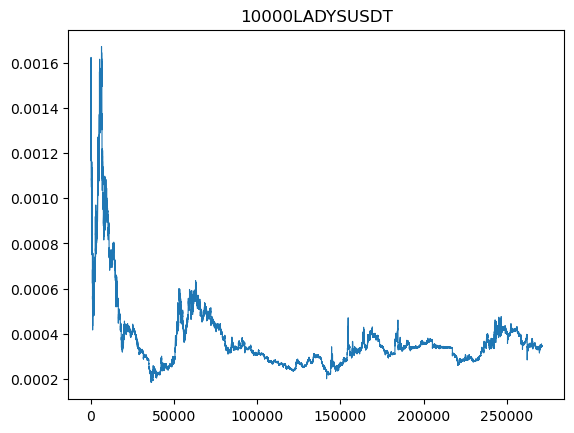

In [5]:
# Plot Price Series
data['Close'].plot(title=symbol, lw=0.8)

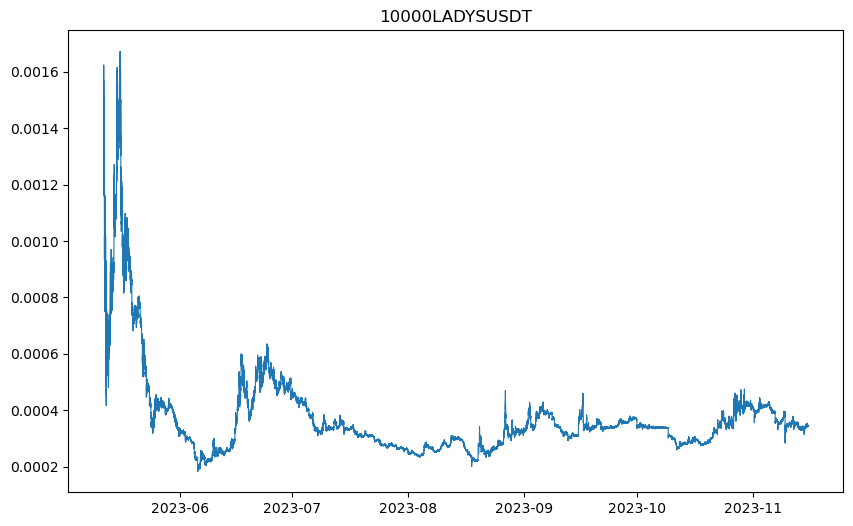

In [6]:
# Plot using matplotlib
from datetime import datetime 
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(pd.to_datetime(data['Time']), data['Close'], lw=0.8)
ax.set_title(symbol)
plt.show()